In [11]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
 
# ext4 = pd.read_excel('ext4_results.xlsx')
xls = pd.ExcelFile('ext4_results.xlsx')
excel_sheets = ['fileserver', 'varmail', 'webserver', 'oltp']

fs_workloads = []
for sheet in excel_sheets:
    fs_workloads.append(pd.read_excel(xls, sheet))
 
# type(fs_workloads[0])

pandas.core.frame.DataFrame

In [12]:
ext4.plot(x='Block Size', y='Throughput', style='o')  
plt.title('Block Size vs Throughput')  
plt.xlabel('Block Size')  
plt.ylabel('Throughput')
plt.savefig('results/ext4/fileserver/plot_1.png')
plt.show()

ext4.plot(x='Inode Size', y='Throughput', style='o')  
plt.title('Inode Size vs Throughput')  
plt.xlabel('Inode Size')  
plt.ylabel('Throughput')
plt.savefig('results/ext4/fileserver/plot_2.png')
plt.show()

ext4.plot(x='Flex BG', y='Throughput', style='o')  
plt.title('Flex BG vs Throughput')  
plt.xlabel('Flex BG')  
plt.ylabel('Throughput')  
plt.savefig('results/ext4/fileserver/plot_3.png')
plt.show()

ext4.plot(x='Journal Option', y='Throughput', style='o')  
plt.title('Journal Option vs Throughput')  
plt.xlabel('Journal Option')  
plt.ylabel('Throughput')  
plt.savefig('results/ext4/fileserver/plot_4.png')
plt.show()

ext4.plot(x='inode_readahead_blks', y='Throughput', style='o')  
plt.title('inode_readahead_blks vs Throughput')  
plt.xlabel('inode_readahead_blks')  
plt.ylabel('Throughput')  
plt.savefig('results/ext4/fileserver/plot_5.png')
plt.show()

ext4.plot(x='I/O Scheduler', y='Throughput', style='o')  
plt.title('I/O Scheduler vs Throughput')  
plt.xlabel('I/O Scheduler')  
plt.ylabel('Throughput') 
plt.savefig('results/ext4/fileserver/plot_6.png')
plt.show()

AttributeError: 'list' object has no attribute 'plot'

In [2]:
import seaborn as sns

parameters = ['Block Size', 'Inode Size', 'Flex BG', 'Journal Option', 'inode_readahead_blks', 'I/O Scheduler']

for index, fs_workload in enumerate(fs_workloads):
    for idx, parameter in enumerate(parameters):
        fig, ax = plt.subplots()
        sns.boxplot(x = parameter, y = "Throughput", data=fs_workload.reset_index())
        plt.savefig('results/ext4/' + excel_sheets[index] + '/boxplot_' + str(idx) +'.png')

NameError: name 'fs_workloads' is not defined

In [25]:
fs_workloads[1].corr()["Throughput"]

Block Size             -0.714584
Inode Size             -0.327874
Flex BG                -0.045749
inode_readahead_blks   -0.000780
Throughput              1.000000
Name: Throughput, dtype: float64

In [31]:
# Highest correlated value

import statsmodels.formula.api as smf

highest_correlation = {}

for index, fs_workload in enumerate(fs_workloads):
    corr = -1
    for parameter in parameters:
        df_new = pd.get_dummies(fs_workload[parameter])
        df_new.columns = ['x1', 'x2', 'x3']

        fs_new = pd.concat([fs_workload, df_new], axis=1)

        fs_new.head()

        model = smf.OLS(fs_new['Throughput'], fs_new[['x1', 'x2', 'x3']]).fit()
        if model.rsquared > corr:
            corr = model.rsquared
            highest_correlation[excel_sheets[index]] = [parameter, corr]

print(highest_correlation)

{'fileserver': ['Journal Option', 0.7427957482364909], 'webserver': ['Inode Size', 0.05664062010143012], 'oltp': ['Inode Size', 0.5081400887270147], 'varmail': ['Block Size', 0.9500085341955447]}


In [66]:
# Second highest correlated value

parameter_values = {
    'Block Size' : [1024, 2048, 4096],
    'Inode Size' : [128, 512, 2048],
    'Flex BG'    : [4, 16, 64],
    'Journal Option' : ['journal', 'ordered', 'writeback'],
    'inode_readahead_blks' : [16, 32, 64],
    'I/O Scheduler' : ['cfq', 'deadline', 'noop']
}

second_highest_correlation = {}

for index, fs_worload in enumerate(fs_workloads):
    max_rsquared = -1
    for param in parameters:
        if param == highest_correlation[excel_sheets[index]][0]:
            continue

        for x in parameter_values[highest_correlation[excel_sheets[index]][0]]:
            fs_stripped = fs_worload[fs_worload[highest_correlation[excel_sheets[index]][0]] == x]
            df_new = pd.get_dummies(fs_stripped[param])
            fs_new = pd.concat([fs_stripped, df_new], axis=1)
#             fs_new.head()
            model = smf.OLS(fs_new['Throughput'], fs_new[df_new.columns]).fit()
            if max_rsquared < model.rsquared:
                max_rsquared = model.rsquared
                second_highest_correlation[excel_sheets[index]] = [param, max_rsquared, x]

print(second_highest_correlation)

{'fileserver': ['I/O Scheduler', 0.9086314843986821, 'ordered'], 'webserver': ['Flex BG', 0.14947695516441772, 2048], 'oltp': ['I/O Scheduler', 0.6725973648234218, 512], 'varmail': ['Inode Size', 0.6340389583730328, 1024]}


In [97]:
# Third highest correlated value

# journal_options = ['journal', 'ordered', 'writeback']
# schedulers = ['cfq', 'deadline', 'noop']
# parameters = ['Block Size', 'Inode Size', 'Flex BG', 'inode_readahead_blks']

# max_rsquared = -1
# important_parameter = ''
# jo = ''
# sch = ''
    
# for param in parameters:
#     for x in journal_options:
#         for y in schedulers:
#             ext4_stripped = fs_workloads[0][(fs_workloads[0]['Journal Option'] == x) & (fs_workloads[0]['I/O Scheduler'] == y)]
#             df_new = pd.get_dummies(ext4_stripped[param])
#             df_new.columns = ['x1', 'x2', 'x3']
#             ext4_new = pd.concat([ext4_stripped, df_new], axis=1)
#             ext4_new.head()
#             model = smf.OLS(ext4_new['Throughput'], ext4_new[['x1', 'x2', 'x3']]).fit()
#             if max_rsquared < model.rsquared:
#                 max_rsquared = model.rsquared
#                 important_parameter = param
#                 jo = x
#                 sch = y
# print(max_rsquared)
# print(jo)
# print(sch)
# print(important_parameter)

third_highest_correlation = {}

for index, fs_worload in enumerate(fs_workloads):
    max_rsquared = -1
    for param in parameters:
        if param == highest_correlation[excel_sheets[index]][0] or \
        param == second_highest_correlation[excel_sheets[index]][0]:
            continue
        
        for x in parameter_values[highest_correlation[excel_sheets[index]][0]]:
            for y in parameter_values[second_highest_correlation[excel_sheets[index]][0]]:
                fs_stripped = fs_workload[(fs_workload[highest_correlation[excel_sheets[index]][0]] == x) \
                    & (fs_workload[second_highest_correlation[excel_sheets[index]][0]] == y)]
                df_new = pd.get_dummies(fs_stripped[param])
                if df_new.empty:
                    continue
                
                fs_new = pd.concat([fs_stripped, df_new], axis=1)
                model = smf.OLS(fs_new['Throughput'], fs_new[df_new.columns]).fit()
                if max_rsquared < model.rsquared:
                    max_rsquared = model.rsquared
                    third_highest_correlation[excel_sheets[index]] = [param, model.rsquared, x, y]
                
print(third_highest_correlation)



{'fileserver': ['Block Size', 0.9548204101917073, 'journal', 'cfq'], 'webserver': ['Block Size', 0.2571809871645496, 2048, 4], 'oltp': ['Block Size', 0.986572219713495, 2048, 'cfq'], 'varmail': ['inode_readahead_blks', 0.004864293335058223, 1024, 512]}


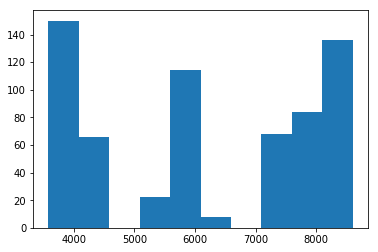

In [44]:


# Make a histogram of all the throughputs
plt.hist(ext4["Throughput"])

# Show the plot.
plt.show()

In [19]:
# Import the kmeans clustering model.
from sklearn.cluster import KMeans

# Initialize the model with 2 parameters -- number of clusters and random state.
kmeans_model = KMeans(n_clusters=5, random_state=1)
# Get only the numeric columns from games.
good_columns = ext4._get_numeric_data()
# Fit the model using the good columns.
kmeans_model.fit(good_columns)
# Get the cluster assignments.
labels = kmeans_model.labels_

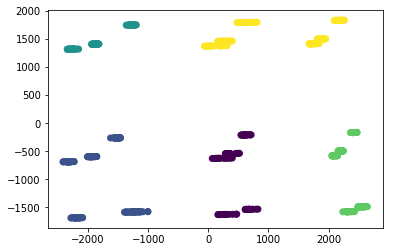

In [20]:
# Import the PCA model.
from sklearn.decomposition import PCA

# Create a PCA model.
pca_2 = PCA(2)
# Fit the PCA model on the numeric columns from earlier.
plot_columns = pca_2.fit_transform(good_columns)
# Make a scatter plot of each game, shaded according to cluster assignment.
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
# Show the plot.
plt.show()

In [21]:
ext4.corr()["Throughput"]

Block Size              0.029758
Inode Size             -0.093913
Flex BG                -0.000635
inode_readahead_blks    0.002213
Throughput              1.000000
Name: Throughput, dtype: float64

In [22]:
# Import a convenience function to split the sets.
from sklearn.cross_validation import train_test_split

# Generate the training set.  Set random_state to be able to replicate results.
train = ext4.sample(frac=0.8, random_state=1)
# Select anything not in the training set and put it in the testing set.
test = ext4.loc[~ext4.index.isin(train.index)]
# Print the shapes of both sets.
print(train.shape)
print(test.shape)

(518, 8)
(130, 8)


/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
# Get all the columns from the dataframe.
columns = ext4.columns.tolist()
# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["Throughput", "FS"]]

# Store the variable we'll be predicting on.
target = "Throughput"

AttributeError: 'unicode' object has no attribute 'conjugate'

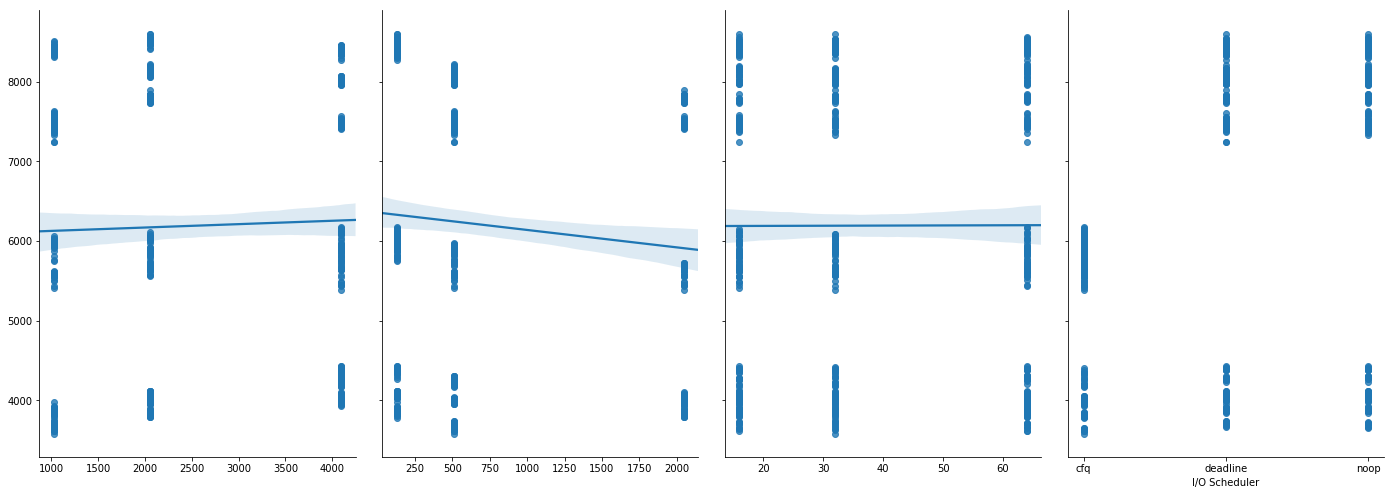

In [30]:
import seaborn as sns
%matplotlib inline

sns.pairplot(ext4, x_vars=['Block Size','Inode Size','inode_readahead_blks', 'I/O Scheduler'], y_vars='Throughput', size=7, aspect=0.7, kind='reg')

Wrong number of arguments. Usage: python3 UB_BB.py trainset testset output display_LC


SystemExit: 

/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
